# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,13.84
1,NaN,"Jan 02, 1979",1979/01/02,22.05
2,NaN,"Jan 03, 1979",1979/01/03,23.70
3,NaN,"Jan 04, 1979",1979/01/04,21.21
4,NaN,"Jan 05, 1979",1979/01/05,20.72
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,44.54
12050,NaN,"Dec 29, 2011",2011/12/29,43.27
12051,NaN,"Dec 30, 2011",2011/12/30,43.36
12052,NaN,"Dec 31, 2011",2011/12/31,38.69


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df['Notes'] != 'Total']

In [5]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,13.84
1,NaN,"Jan 02, 1979",1979/01/02,22.05
2,NaN,"Jan 03, 1979",1979/01/03,23.70
3,NaN,"Jan 04, 1979",1979/01/04,21.21
4,NaN,"Jan 05, 1979",1979/01/05,20.72
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,40.88
12049,NaN,"Dec 28, 2011",2011/12/28,44.54
12050,NaN,"Dec 29, 2011",2011/12/29,43.27
12051,NaN,"Dec 30, 2011",2011/12/30,43.36


In [6]:
df = df.drop('Notes', axis=1)

In [7]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,13.84
1,"Jan 02, 1979",1979/01/02,22.05
2,"Jan 03, 1979",1979/01/03,23.70
3,"Jan 04, 1979",1979/01/04,21.21
4,"Jan 05, 1979",1979/01/05,20.72
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.88
12049,"Dec 28, 2011",2011/12/28,44.54
12050,"Dec 29, 2011",2011/12/29,43.27
12051,"Dec 30, 2011",2011/12/30,43.36


>3) Make a column called Date that is in the pandas datetime format

In [8]:
#dates['Date_Fixed'] = pd.to_datetime(dates['Date'],errors='raise')
#dates[['Name','Date','Date_Fixed', 'Status']]

df['Date']= pd.to_datetime(df['Month Day, Year'],errors='raise')
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,13.84,1979-01-01
1,"Jan 02, 1979",1979/01/02,22.05,1979-01-02
2,"Jan 03, 1979",1979/01/03,23.70,1979-01-03
3,"Jan 04, 1979",1979/01/04,21.21,1979-01-04
4,"Jan 05, 1979",1979/01/05,20.72,1979-01-05
...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.88,2011-12-27
12049,"Dec 28, 2011",2011/12/28,44.54,2011-12-28
12050,"Dec 29, 2011",2011/12/29,43.27,2011-12-29
12051,"Dec 30, 2011",2011/12/30,43.36,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [9]:
df[['Year', 'Month', 'Day']] = df['Month Day, Year'].str.replace(',', '').str.split(expand = True)
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,13.84,1979-01-01,Jan,01,1979
1,"Jan 02, 1979",1979/01/02,22.05,1979-01-02,Jan,02,1979
2,"Jan 03, 1979",1979/01/03,23.70,1979-01-03,Jan,03,1979
3,"Jan 04, 1979",1979/01/04,21.21,1979-01-04,Jan,04,1979
4,"Jan 05, 1979",1979/01/05,20.72,1979-01-05,Jan,05,1979
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.88,2011-12-27,Dec,27,2011
12049,"Dec 28, 2011",2011/12/28,44.54,2011-12-28,Dec,28,2011
12050,"Dec 29, 2011",2011/12/29,43.27,2011-12-29,Dec,29,2011
12051,"Dec 30, 2011",2011/12/30,43.36,2011-12-30,Dec,30,2011


In [10]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<function matplotlib.pyplot.show(close=None, block=None)>

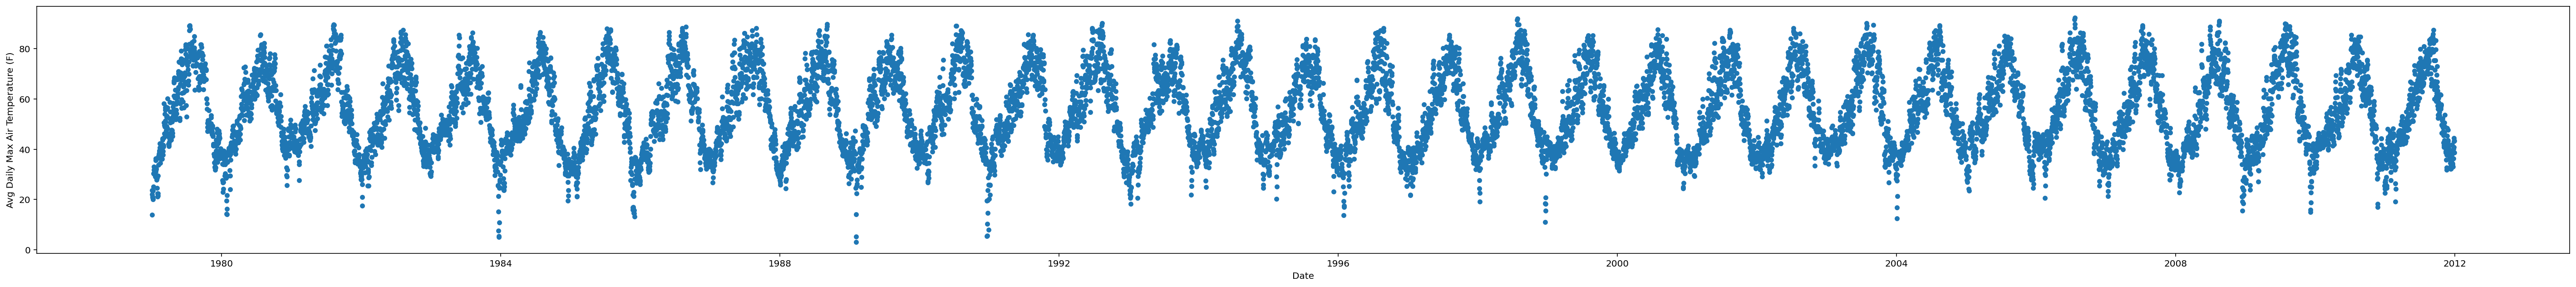

In [11]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize=(50,5))
plt.show

>5) Describe your plot.

In [12]:
#The x-axis is set into intervals of 4 years. The points on the scatterplot are show a consistency of starting around 20 Farenheit, rises past 80F, then drops down.

### Adding colors for our graph

In [13]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<function matplotlib.pyplot.show(close=None, block=None)>

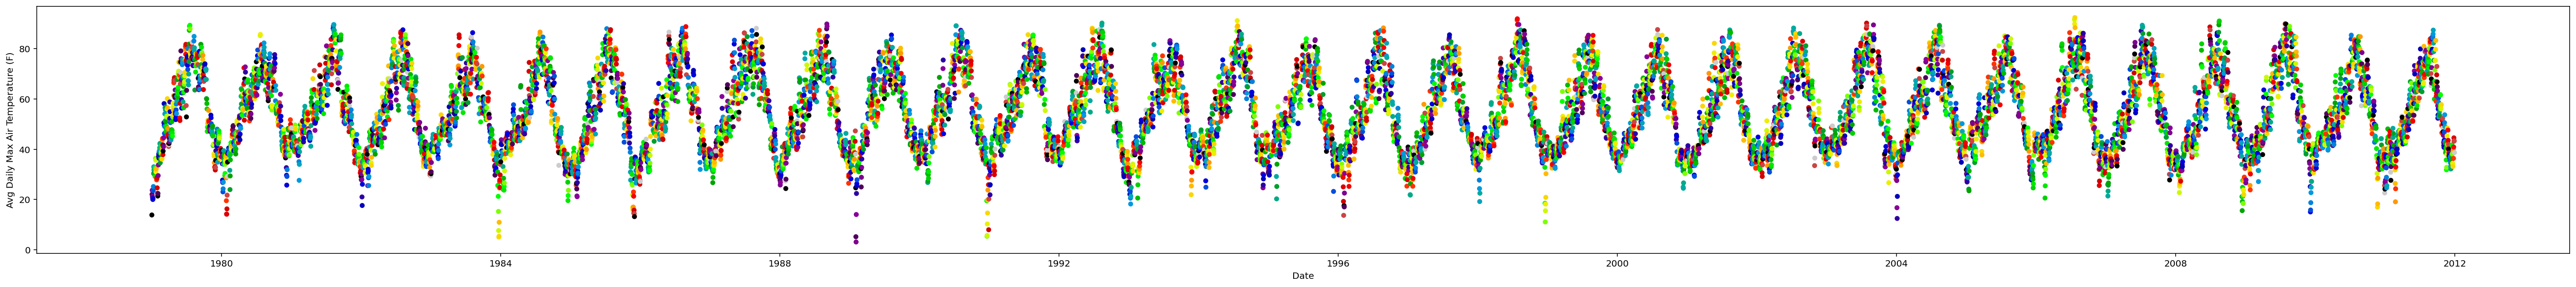

In [14]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', c=df['color'], figsize=(50,5))
plt.show

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [15]:
start_date = pd.datetime(1999,1, 1)
end_date = pd.datetime(1999, 7, 1)
subset_df= df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
subset_df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
7305,"Jan 01, 1999",1999/01/01,37.83,1999-01-01,Jan,01,1999,9151488.0,#000000
7306,"Jan 02, 1999",1999/01/02,37.74,1999-01-02,Jan,02,1999,9152352.0,#4f005b
7307,"Jan 03, 1999",1999/01/03,37.62,1999-01-03,Jan,03,1999,9153216.0,#7d008e
7308,"Jan 04, 1999",1999/01/04,37.94,1999-01-04,Jan,04,1999,9154080.0,#880099
7309,"Jan 05, 1999",1999/01/05,39.50,1999-01-05,Jan,05,1999,9154944.0,#2d00a4
...,...,...,...,...,...,...,...,...,...
7482,"Jun 27, 1999",1999/06/27,63.05,1999-06-27,Jun,27,1999,9304416.0,#f40000
7483,"Jun 28, 1999",1999/06/28,58.68,1999-06-28,Jun,28,1999,9305280.0,#dd0000
7484,"Jun 29, 1999",1999/06/29,64.91,1999-06-29,Jun,29,1999,9306144.0,#d20000
7485,"Jun 30, 1999",1999/06/30,65.86,1999-06-30,Jun,30,1999,9307008.0,#cc4444


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<function matplotlib.pyplot.show(close=None, block=None)>

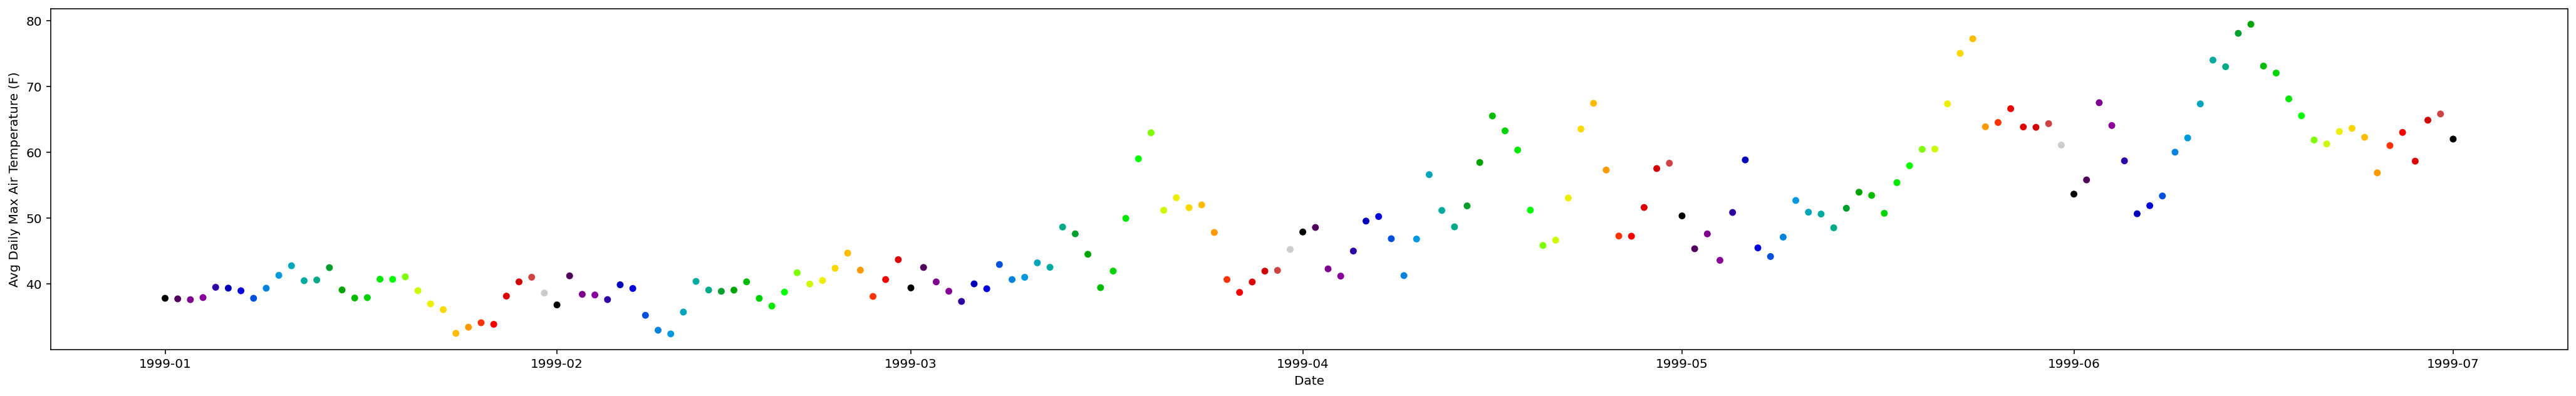

In [16]:
subset_df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', c=subset_df['color'], figsize=(36,5))
plt.show

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [17]:
X=subset_df['DateInt'].values
Y=subset_df['Avg Daily Max Air Temperature (F)'].values

In [18]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [19]:
Y_pred = lin_reg(X,Y)

0.0002056206807814451 -1848.5739641157672


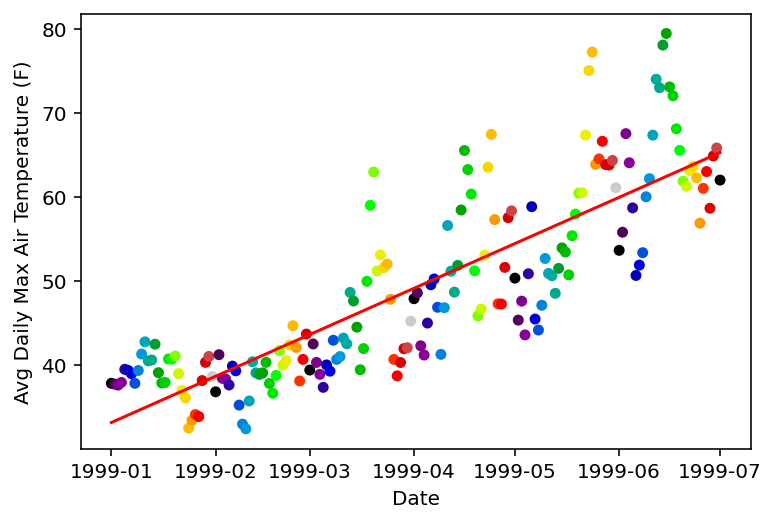

In [20]:
subset_df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset_df['color'])
plt.plot([min(subset_df['Date'].values), max(subset_df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [22]:
min_Y= Y.min()
min_Y

32.41

In [23]:
max_Y =Y.max()
max_Y

79.5

In [ ]:
#it is positive

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [24]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [25]:
Y_pred = lin_reg(X,Y)

4.049325001670485e-08 54.8563591653277


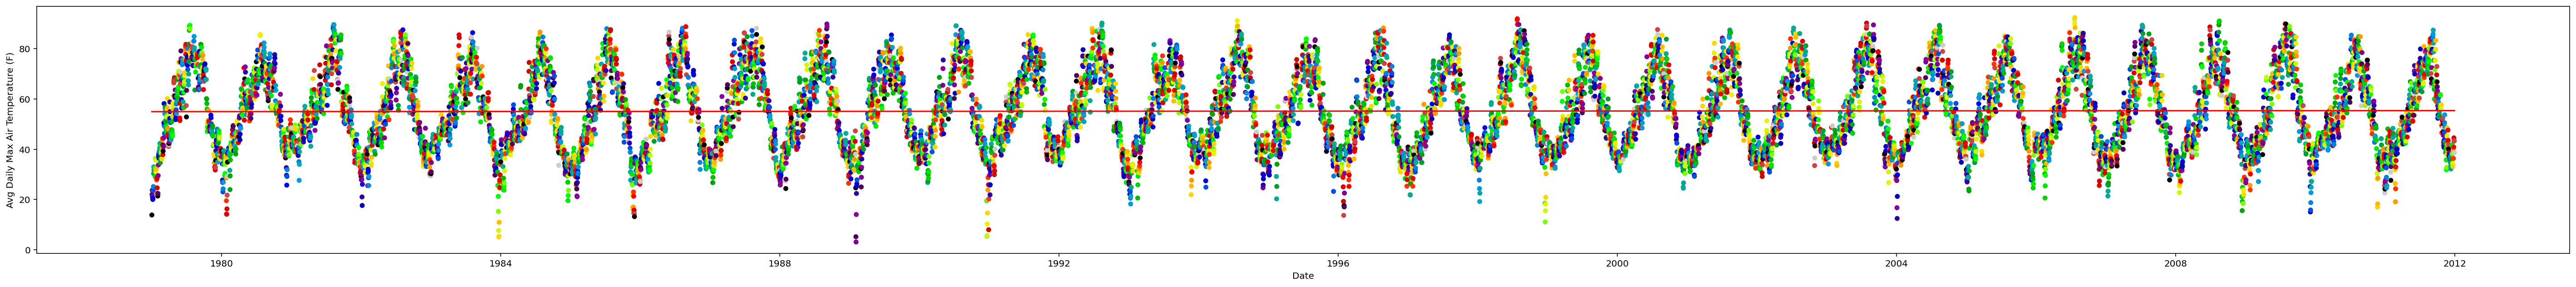

In [28]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize=(50,5),c=df['color'])
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [29]:
#The slope is positive (4.043). There is a correlation between the time of year and the avg. daily max air temperature. 